# Simple TF Neural Network
In this notebook we will create a very simple Neural Network to work with the basic concepts of Tensorflow. In particular:
- Build a Graph
- Initiate the Session
- Feed the Data in and get Output

## Libraries

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(101)
tf.set_random_seed(101)
%matplotlib inline

# 1. Neural Network
Toy Example to show what are the main parts needed to build the Neural Network. We simply give random values to the weights and bias and we don't even adjust them, so no training in this frist example

In [13]:
# Parameters
n_features = 10
n_dense_neurons = 3

## 1.1 Placeholders

In [14]:
x = tf.placeholder(tf.float32,(None,n_features))

## 1.2 Variables

In [16]:
# Weights
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

# Bias
b = tf.Variable(tf.ones([n_dense_neurons]))

## 1.3 Operations

In [18]:
# Matrix Multiplication between input and weights
xW = tf.matmul(x,W)

# Add Bias
z = tf.add(xW,b)

# Acrtivation Function
a = tf.sigmoid(z)

## 1.4 Session

In [20]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict = {x: np.random.random([1, n_features])})

In [21]:
print(layer_out)

[[0.17399846 0.19412865 0.6028328 ]]


# 2. Neural Network Regression Example

## 2.1 Data

In [22]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5, 10)
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [23]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

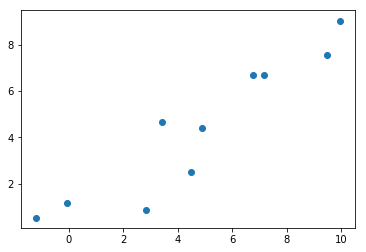

In [30]:
plt.scatter(x_data, y_label)

y = mx + b

## 2.2 Variable

In [33]:
# Pick 2 random number, that will be adjusted by the NN to fit the points
m = tf.Variable(0.44)
b = tf.Variable(0.87)

## 2.3 Training

In [36]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = m*x + b
    
    # Cost Function
    error += (y-y_hat)**2

In [40]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## 2.4 Session

In [43]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    # Number of epochs
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

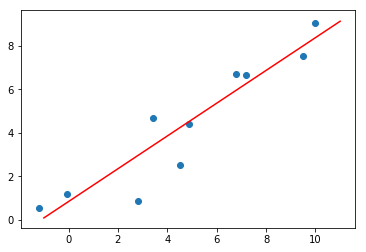

In [44]:
x_test = np.linspace(-1, 11, 10)

# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.scatter(x_data, y_label)